
# Trabalho de Sistemas Inteligentes para a Bioinformática

Trabalho realizado no âmbito da unidade curricular de Sistemas Inteligentes para a Bioinformática.

Grupo constituído por:

    - Angelina Eiras PG42861
    - Carina Gonçalves PG45466
    - Rute Castro PG45475
    - Sónia Carvalho PG42882


Para a utilização deste notebook é necessário proceder às seguintes instalações:

In [ ]:
# pip install git+https://github.com/jcapels/propythia.git@fix_dependencies
#ou download do ficheiro em formato zip
# pip install propythia.zip --user
# pip install seaborn
# pip install --upgrade pip
# pip install tensorflow==2.11.0
# pip install keras
# pip install umap-learn[plot]
# pip install bio-embeddings[all]

In [51]:
import pandas as pd
import scipy.cluster.hierarchy
import seaborn as sn
import numpy as np
from tensorflow import keras
from keras.optimizers.schedules import *
from propythia import *
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import r_regression
from scipy import stats
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
import statsmodels.api as statsmodels
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import re
import random
import requests as r
from Bio import SeqIO
from io import StringIO
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.optimizers.schedules import *

from propythia import *
from propythia.protein_descriptores import ProteinDescritors

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import auc, roc_curve, matthews_corrcoef, f1_score, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, hinge_loss, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, SelectPercentile

import matplotlib.pyplot as plt

## Exploração inicial

Nesta secção são apresentados os dados provenientes do desafio Kaggle (https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction).

Os datasets abordam o tema de enzimas que são proteínas que atuam como catalisadores nas reações químicas dos organismos vivos.

O objetivo do trabalho é prever a termoestabilidade de variantes enzimáticas, uma vez que compreender e prever com precisão a estabilidade da proteína é um problema fundamental na biotecnologia. Melhorias na estabilidade da enzima podem reduzir os custos e aumentar a velocidade que os cientistas podem iterar nos conceitos.

Os dados de termoestabilidade (temperatura de fusão) foram medidos experimentalmente e incluem sequências naturais, bem como sequências modificadas com mutações únicas ou múltiplas nas sequências naturais.



## Pré-processamento

Ler os datasets provenientes do desafio

In [189]:
#train = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/train.csv", delimiter=',')
#test = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/test.csv", delimiter=',')
#updates = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/train_updates_20220929.csv")

In [2]:
train = pd.read_csv("train.csv", delimiter=';')
test = pd.read_csv("test.csv")
updates = pd.read_csv("train_updates_20220929.csv")

In [3]:
train

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31392,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31393,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31394,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31395,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [4]:
updates

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2429,30738,NaN,NaN,NaN,NaN
2430,30739,NaN,NaN,NaN,NaN
2431,30740,NaN,NaN,NaN,NaN
2432,30741,NaN,NaN,NaN,NaN


In [5]:
test

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


Juntar dataset de treino com os updates dados pela competição

In [6]:
#colunas para fazer o update
col_to_update = ['protein_sequence', 'pH', 'tm']

#seq_id update
to_update_id = list(updates[~updates.protein_sequence.isna()].seq_id)

#faz o update só nas linhas que são necessarias
updates = updates[updates.seq_id.isin(to_update_id)].set_index('seq_id')

#update dos valores no dataset de treino
train.loc[to_update_id, col_to_update] = updates[col_to_update].values

#verificar se está com os updates
pd.concat([train[train.seq_id.isin(to_update_id)].set_index('seq_id'), updates], axis = 1)

#nao precisamos dos links - drop do data_source
train.drop(['data_source'], axis=1, inplace=True)

train


,seq_id,protein_sequence,pH,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...,...
31392,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
31393,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
31394,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
31395,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


### Gerar descritores

Para gerar descritores foi utilizado o propythia, desenvolvido na Universidade do Minho.
Através da sua utilização, foi possível obter descritores físico-químicos que vão ser utilizados para o resto do trabalho.

In [ ]:
#obter os descritores
descriptors_df = ProteinDescritors(dataset= train ,  col= 'protein_sequence')
descriptors_df.dataset

In [7]:
# tamanho das sequencias

In [ ]:
descriptors_df.get_lenght(n_jobs=4)
descriptors_df

In [ ]:
# quantidades de aa

In [ ]:
descriptors_df.get_aa_comp(n_jobs=4)
descriptors_df

Descritores físico-químicos gerados:
  
length, charge, chargedensity, formulaC, formulaH, formulaN, formulaO, formulaS, tot, hydrogen, single, double, MW_modlamp, Gravy, Aromacity, IsoelectricPoint, Instability_index, SecStruct_helix, SecStruct_turn, SecStruct_sheet, Molar_extinction_coefficient_reduced, Molar_extinction_coefficient_oxidized, aliphatic_index, bomanindex, hydrophobic_ratio.

In [ ]:
all_descriptors = descriptors_df.get_all_physicochemical(ph=7, amide=False, n_jobs=4)
all_descriptors
all_descriptors.to_csv('descriptors.csv')

### Importar dados físico-químicos

Estes dados são provenientes do código anterior, onde foram colocadas todas as características físico-químicas num único ficheiro csv, de maneira a facilitar e agilizar o processo.

In [2]:
dataset = pd.read_csv("descriptors.csv", delimiter=';')
dataset

,Unnamed: 0,seq_id,protein_sequence,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
0,0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,341.0,-1.732,-0.000048,1622,2623,447,...,28.389736,0.316716,0.211144,0.351906,26470,26470,102.991202,1.020440,0.454545,75.7
1,1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,286.0,-12.537,-0.000382,1385,2224,412,...,65.108392,0.213287,0.160839,0.367133,20970,20970,72.062937,3.240490,0.297203,50.5
2,2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,497.0,11.513,0.000215,2290,3559,669,...,35.089336,0.209256,0.267606,0.213280,40340,40840,54.245473,2.168934,0.301811,40.5
3,3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,265.0,-20.606,-0.000699,1293,2006,338,...,50.502264,0.267925,0.215094,0.298113,22460,22710,78.792453,1.902415,0.343396,47.2
4,4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1451.0,-21.900,-0.000138,6948,10869,1869,...,45.668808,0.271537,0.292901,0.206065,158030,158905,77.746382,1.684390,0.318401,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,28734,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,549.0,5.709,0.000092,2710,4196,774,...,48.604026,0.287796,0.242259,0.224044,98320,99070,75.792350,2.063898,0.336976,51.8
28735,28735,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,469.0,-3.132,-0.000060,2342,3642,632,...,35.285096,0.324094,0.217484,0.270789,48360,48610,92.942431,1.389019,0.402985,37.2
28736,28736,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,128.0,-2.866,-0.000202,626,936,158,...,44.198437,0.265625,0.250000,0.257812,27960,27960,62.578125,1.293672,0.367188,64.6
28737,28737,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,593.0,-9.209,-0.000143,2832,4477,753,...,36.618398,0.288364,0.268128,0.259696,43320,43570,83.355818,1.334250,0.384486,50.7


In [3]:
#dataset = pd.read_csv("C:/Users/sonia/Downloads/SIB_Trabalho-main-master/kag/descriptors.csv", delimiter=';', header=0)

In [4]:
#tamanho e primeiras linhas

print (dataset.shape)
dataset.head()

(28739, 30)


,Unnamed: 0,seq_id,protein_sequence,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
0,0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,341.0,-1.732,-0.000048,1622,2623,447,...,28.389736,0.316716,0.211144,0.351906,26470,26470,102.991202,1.020440,0.454545,75.7
1,1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,286.0,-12.537,-0.000382,1385,2224,412,...,65.108392,0.213287,0.160839,0.367133,20970,20970,72.062937,3.240490,0.297203,50.5
2,2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,497.0,11.513,0.000215,2290,3559,669,...,35.089336,0.209256,0.267606,0.213280,40340,40840,54.245473,2.168934,0.301811,40.5
3,3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,265.0,-20.606,-0.000699,1293,2006,338,...,50.502264,0.267925,0.215094,0.298113,22460,22710,78.792453,1.902415,0.343396,47.2
4,4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1451.0,-21.900,-0.000138,6948,10869,1869,...,45.668808,0.271537,0.292901,0.206065,158030,158905,77.746382,1.684390,0.318401,49.5


In [5]:
#verificacao dos data types

data_types = dataset.dtypes
print(data_types)


Unnamed: 0                                 int64
seq_id                                     int64
protein_sequence                          object
pH                                       float64
length                                   float64
charge                                   float64
chargedensity                            float64
formulaC                                   int64
formulaH                                   int64
formulaN                                   int64
formulaO                                   int64
formulaS                                   int64
tot                                        int64
hydrogen                                   int64
single                                     int64
double                                     int64
MW_modlamp                               float64
Gravy                                    float64
Aromacity                                float64
IsoelectricPoint                         float64
Instability_index   

sumarização de valores estatísticos gerais

In [6]:
dataset.describe()
#as variáveis têm valores em gamas muito diferentes, 
#por isso será preciso fazer normalização dos dados


,Unnamed: 0,seq_id,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
count,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,...,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000,28739.000000
mean,14369.000000,15545.248234,6.951551,461.012457,-5.313969,-0.000062,2258.002679,3541.273357,609.005915,711.923240,...,40.477407,0.296239,0.226101,0.267736,48028.957862,48425.448693,85.234561,1.683476,0.370748,49.350659
std,8296.379029,9224.897566,0.951033,430.562526,18.652624,0.000334,2085.418633,3274.813811,568.801797,685.215374,...,11.352726,0.044597,0.043856,0.048460,47705.473385,48142.209405,14.395127,0.551643,0.049421,13.731283
min,0.000000,0.000000,1.990000,5.000000,-903.437000,-0.002708,22.000000,40.000000,8.000000,7.000000,...,-7.383333,0.022727,0.030769,0.000000,0.000000,0.000000,0.000000,-1.661429,0.045977,0.000000
25%,7184.500000,7440.500000,7.000000,219.000000,-9.853500,-0.000232,1086.000000,1700.000000,290.000000,334.000000,...,33.358050,0.274854,0.199166,0.237401,19940.000000,20190.000000,77.061510,1.386256,0.342857,42.300000
50%,14369.000000,15188.000000,7.000000,356.000000,-3.347000,-0.000082,1751.000000,2745.000000,469.000000,541.000000,...,39.665278,0.299758,0.222222,0.265957,35300.000000,35450.000000,85.596817,1.660613,0.372727,48.000000
75%,21553.500000,23694.500000,7.000000,544.000000,3.029000,0.000086,2687.000000,4182.000000,718.000000,833.000000,...,46.754319,0.319873,0.246106,0.293698,60390.000000,61030.000000,94.006806,1.981683,0.399216,53.500000
max,28738.000000,31389.000000,64.900000,8798.000000,396.696000,0.002890,43327.000000,68830.000000,11684.000000,14709.000000,...,141.642748,0.632653,0.747126,0.579832,920160.000000,928160.000000,194.285714,5.281972,0.637681,130.000000


Valores omissos

In [7]:
#confirmar que não há dados omissos 

dataset.isnull().sum().sum() #output: não há dados omissos


0

perceber se há colunas com todos os valores iguais (variância = zero)

In [8]:
dataset.var(axis=0)

#aqui também se pode criar um threshold e eliminar columas com variancia inferior a um valor

Unnamed: 0                               6.882990e+07
seq_id                                   8.509874e+07
pH                                       9.044631e-01
length                                   1.853841e+05
charge                                   3.479204e+02
chargedensity                            1.117612e-07
formulaC                                 4.348971e+06
formulaH                                 1.072441e+07
formulaN                                 3.235355e+05
formulaO                                 4.695201e+05
formulaS                                 3.406342e+02
tot                                      0.000000e+00
hydrogen                                 0.000000e+00
single                                   0.000000e+00
double                                   0.000000e+00
MW_modlamp                               2.310338e+09
Gravy                                    1.018051e-01
Aromacity                                6.410086e-04
IsoelectricPoint            

In [9]:
#drop das colunas que só têm valores = 0

df = dataset.drop(columns=['tot', 'hydrogen', 'single', 'double'], axis=1)
df

,Unnamed: 0,seq_id,protein_sequence,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
0,0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,341.0,-1.732,-0.000048,1622,2623,447,...,28.389736,0.316716,0.211144,0.351906,26470,26470,102.991202,1.020440,0.454545,75.7
1,1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,286.0,-12.537,-0.000382,1385,2224,412,...,65.108392,0.213287,0.160839,0.367133,20970,20970,72.062937,3.240490,0.297203,50.5
2,2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,497.0,11.513,0.000215,2290,3559,669,...,35.089336,0.209256,0.267606,0.213280,40340,40840,54.245473,2.168934,0.301811,40.5
3,3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,265.0,-20.606,-0.000699,1293,2006,338,...,50.502264,0.267925,0.215094,0.298113,22460,22710,78.792453,1.902415,0.343396,47.2
4,4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1451.0,-21.900,-0.000138,6948,10869,1869,...,45.668808,0.271537,0.292901,0.206065,158030,158905,77.746382,1.684390,0.318401,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,28734,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,549.0,5.709,0.000092,2710,4196,774,...,48.604026,0.287796,0.242259,0.224044,98320,99070,75.792350,2.063898,0.336976,51.8
28735,28735,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,469.0,-3.132,-0.000060,2342,3642,632,...,35.285096,0.324094,0.217484,0.270789,48360,48610,92.942431,1.389019,0.402985,37.2
28736,28736,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,128.0,-2.866,-0.000202,626,936,158,...,44.198437,0.265625,0.250000,0.257812,27960,27960,62.578125,1.293672,0.367188,64.6
28737,28737,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,593.0,-9.209,-0.000143,2832,4477,753,...,36.618398,0.288364,0.268128,0.259696,43320,43570,83.355818,1.334250,0.384486,50.7


eliminar linhas duplicadas

In [10]:
df = df.drop_duplicates(subset = "seq_id")

drop das colunas seguintes para ser possível fazer o pre porcessamento dos dados

In [11]:
df = df.drop(columns=['seq_id', 'protein_sequence'], axis=1)
df

,Unnamed: 0,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
0,0,7.0,341.0,-1.732,-0.000048,1622,2623,447,473,9,...,28.389736,0.316716,0.211144,0.351906,26470,26470,102.991202,1.020440,0.454545,75.7
1,1,7.0,286.0,-12.537,-0.000382,1385,2224,412,490,2,...,65.108392,0.213287,0.160839,0.367133,20970,20970,72.062937,3.240490,0.297203,50.5
2,2,7.0,497.0,11.513,0.000215,2290,3559,669,760,15,...,35.089336,0.209256,0.267606,0.213280,40340,40840,54.245473,2.168934,0.301811,40.5
3,3,7.0,265.0,-20.606,-0.000699,1293,2006,338,428,7,...,50.502264,0.267925,0.215094,0.298113,22460,22710,78.792453,1.902415,0.343396,47.2
4,4,7.0,1451.0,-21.900,-0.000138,6948,10869,1869,2252,45,...,45.668808,0.271537,0.292901,0.206065,158030,158905,77.746382,1.684390,0.318401,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,28734,7.0,549.0,5.709,0.000092,2710,4196,774,829,25,...,48.604026,0.287796,0.242259,0.224044,98320,99070,75.792350,2.063898,0.336976,51.8
28735,28735,7.0,469.0,-3.132,-0.000060,2342,3642,632,698,19,...,35.285096,0.324094,0.217484,0.270789,48360,48610,92.942431,1.389019,0.402985,37.2
28736,28736,7.0,128.0,-2.866,-0.000202,626,936,158,198,8,...,44.198437,0.265625,0.250000,0.257812,27960,27960,62.578125,1.293672,0.367188,64.6
28737,28737,7.0,593.0,-9.209,-0.000143,2832,4477,753,884,31,...,36.618398,0.288364,0.268128,0.259696,43320,43570,83.355818,1.334250,0.384486,50.7


In [53]:
columns = df.columns
columns

Index(['Unnamed: 0', 'pH', 'length', 'charge', 'chargedensity', 'formulaC',
       'formulaH', 'formulaN', 'formulaO', 'formulaS', 'MW_modlamp', 'Gravy',
       'Aromacity', 'IsoelectricPoint', 'Instability_index', 'SecStruct_helix',
       'SecStruct_turn', 'SecStruct_sheet',
       'Molar_extinction_coefficient_reduced',
       'Molar_extinction_coefficient_oxidized', 'aliphatic_index',
       'bomanindex', 'hydrophobic_ratio', 'tm'],
      dtype='object')

Visualização rápida de histograma de todas as variáveis

Podemos ver que a maior parte não parece seguir distribuição normal

array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'pH'}>,
        <AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'charge'}>,
        <AxesSubplot: title={'center': 'chargedensity'}>],
       [<AxesSubplot: title={'center': 'formulaC'}>,
        <AxesSubplot: title={'center': 'formulaH'}>,
        <AxesSubplot: title={'center': 'formulaN'}>,
        <AxesSubplot: title={'center': 'formulaO'}>,
        <AxesSubplot: title={'center': 'formulaS'}>],
       [<AxesSubplot: title={'center': 'MW_modlamp'}>,
        <AxesSubplot: title={'center': 'Gravy'}>,
        <AxesSubplot: title={'center': 'Aromacity'}>,
        <AxesSubplot: title={'center': 'IsoelectricPoint'}>,
        <AxesSubplot: title={'center': 'Instability_index'}>],
       [<AxesSubplot: title={'center': 'SecStruct_helix'}>,
        <AxesSubplot: title={'center': 'SecStruct_turn'}>,
        <AxesSubplot: title={'center': 'SecStruct_sheet'}>,
        <

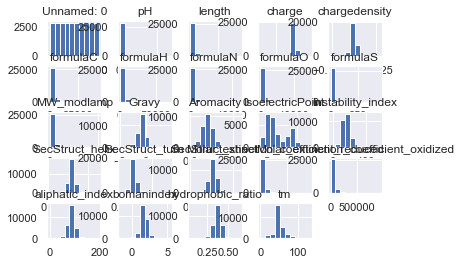

In [13]:
df.hist(rwidth=1.5)

#para apresentação, o histograma precisa de ser melhorado (legendas, etc)
#as primeiras variáveis (seq_id, unnamed) não deverão ser usadas

#testar normalidade dos dados quantitativamente com o teste shapiro - COMO FAZER? DEU SEMPRE ERRO

Teste Shapiro para verificar a normalidade dos dados

In [14]:
scipy.stats.shapiro(x = df)
# rejeita se a Ho, os dados não estão normais

ShapiroResult(statistic=0.32889169454574585, pvalue=0.0)

Normalização dos dados através do Standard Scaler 

In [15]:
#fazer normalização dos dados de X
data = StandardScaler().fit(df)
data_st = data.transform(df)

#sumariar os dados transformados (atenção que agora é array numpy e não panda dataframe)
np.set_printoptions(precision = 3)

#converter de novo a panda dataframe 
data_scale =  pd.DataFrame(data_st, index =df.index , columns = df.columns)
data_scale

#sumariar estatísticas
data_scale.describe()

,Unnamed: 0,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
count,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,...,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04,2.873900e+04
mean,-1.202204e-17,7.594596e-16,4.532409e-16,-2.255581e-16,-1.628905e-16,-4.554719e-16,2.600848e-16,-3.044518e-16,-1.162525e-16,3.042499e-16,...,-6.142588e-16,1.101732e-15,3.593052e-16,7.475144e-19,4.568143e-16,1.481971e-16,9.956351e-16,2.353337e-16,4.328243e-16,-6.335638e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.731991e+00,-5.217105e+00,-1.059127e+00,-4.815079e+01,-7.917032e+00,-1.072227e+00,-1.069170e+00,-1.056636e+00,-1.028779e+00,-9.462417e-01,...,-4.215866e+00,-6.133037e+00,-4.453971e+00,-5.524987e+00,-1.006798e+00,-1.005901e+00,-5.921174e+00,-6.063638e+00,-6.571620e+00,-3.594094e+00
25%,-8.659953e-01,5.094425e-02,-5.620941e-01,-2.433765e-01,-5.111033e-01,-5.620085e-01,-5.622626e-01,-5.608482e-01,-5.515489e-01,-5.669603e-01,...,-6.271164e-01,-4.795361e-01,-6.141835e-01,-6.260056e-01,-5.888097e-01,-5.865111e-01,-5.677751e-01,-5.388008e-01,-5.643644e-01,-5.134831e-01
50%,0.000000e+00,5.094425e-02,-2.439002e-01,1.054545e-01,-6.170094e-02,-2.431222e-01,-2.431550e-01,-2.461461e-01,-2.494489e-01,-2.418620e-01,...,-7.153732e-02,7.890323e-02,-8.844907e-02,-3.671070e-02,-2.668285e-01,-2.695280e-01,2.516559e-02,-4.144638e-02,4.004624e-02,-9.836538e-02
75%,8.659953e-01,5.094425e-02,1.927455e-01,4.472890e-01,4.404803e-01,2.057164e-01,1.956563e-01,1.916238e-01,1.767019e-01,1.916024e-01,...,5.529087e-01,5.299474e-01,4.561483e-01,5.357371e-01,2.591161e-01,2.618237e-01,6.094005e-01,5.405891e-01,5.760343e-01,3.021868e-01
max,1.731991e+00,6.093319e+01,1.936335e+01,2.155284e+01,8.830634e+00,1.969375e+01,1.993697e+01,1.947108e+01,2.042762e+01,2.305685e+01,...,8.911261e+00,7.543492e+00,1.188045e+01,6.440378e+00,1.828189e+01,1.827398e+01,7.575692e+00,6.523347e+00,5.401286e+00,5.873504e+00


verificar a normalidade da termoestabilidade após StandardScaler

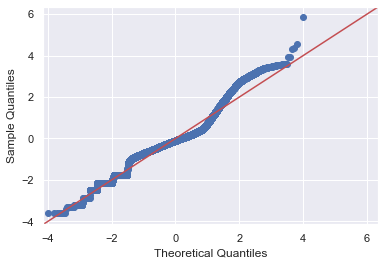

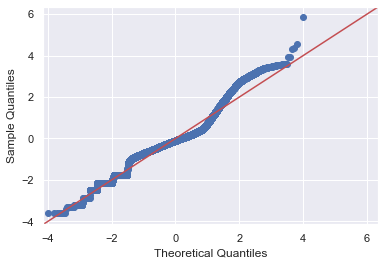

In [16]:
statsmodels.qqplot(data_scale.tm, dist = stats.norm, line = '45', ax = None)


Distribuição da termoestabilidade

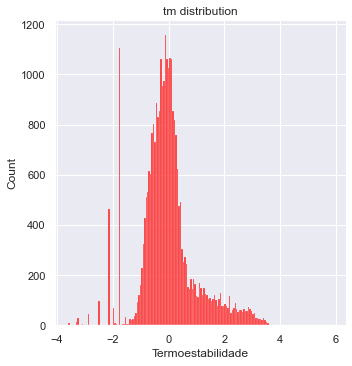

In [17]:

sn.displot(data = data_scale, x = 'tm', color = 'red')
plt.xlabel('Termoestabilidade')
plt.title('tm distribution')
plt.show()

Como a distribuição geral dos dados não parece normal, vamos realizar o teste de Shapiro

In [18]:
scipy.stats.shapiro(x = data_scale)
# rejeita se a Ho, os dados não estão normais

ShapiroResult(statistic=0.8629947900772095, pvalue=0.0)

Correlação entre as variaveis

In [19]:
corr_matrix = data_scale.corr()
#corr_matrix

#transformar em pandas dataframe (mais facil visualizaçao)
corr_dataframe = pd.DataFrame(corr_matrix)
corr_dataframe

,Unnamed: 0,pH,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio,tm
Unnamed: 0,1.000000,-0.019184,-0.016976,0.022823,0.018067,-0.016701,-0.015960,-0.015623,-0.016501,-0.018040,...,-0.039385,0.024489,-0.021122,-0.017594,-0.023570,-0.023780,0.028664,0.008217,0.004314,0.003711
pH,-0.019184,1.000000,0.012413,-0.026170,-0.127817,0.013363,0.012447,0.010793,0.010698,0.001170,...,0.067457,0.024607,0.040893,0.025240,-0.002451,-0.002757,0.008056,-0.053055,0.001705,0.004650
length,-0.016976,0.012413,1.000000,-0.509214,-0.133545,0.998779,0.998725,0.998537,0.998140,0.875966,...,0.221563,-0.145833,0.130881,-0.020341,0.836082,0.838196,-0.095124,0.111823,-0.150437,-0.076283
charge,0.022823,-0.026170,-0.509214,1.000000,0.611052,-0.506844,-0.501853,-0.492257,-0.533917,-0.420126,...,-0.050752,0.047601,0.057354,-0.130251,-0.424229,-0.425497,0.026766,-0.052645,0.057371,0.049609
chargedensity,0.018067,-0.127817,-0.133545,0.611052,1.000000,-0.132815,-0.127395,-0.118161,-0.148362,-0.103832,...,-0.030650,-0.040692,0.076594,-0.213483,-0.116153,-0.116179,-0.036021,0.058152,-0.012935,-0.011778
formulaC,-0.016701,0.013363,0.998779,-0.506844,-0.132815,1.000000,0.999620,0.998124,0.996641,0.874882,...,0.217614,-0.121156,0.110355,-0.018321,0.848774,0.850696,-0.084006,0.109832,-0.142218,-0.075088
formulaH,-0.015960,0.012447,0.998725,-0.501853,-0.127395,0.999620,1.000000,0.998399,0.996719,0.872841,...,0.218662,-0.124754,0.104192,-0.009292,0.838114,0.840072,-0.076246,0.113364,-0.137758,-0.073827
formulaN,-0.015623,0.010793,0.998537,-0.492257,-0.118161,0.998124,0.998399,1.000000,0.997166,0.873181,...,0.233875,-0.155008,0.120267,-0.019048,0.836195,0.838254,-0.103960,0.140228,-0.163374,-0.072777
formulaO,-0.016501,0.010698,0.998140,-0.533917,-0.148362,0.996641,0.996719,0.997166,1.000000,0.867383,...,0.231892,-0.166361,0.124727,-0.025078,0.827235,0.829298,-0.115624,0.143394,-0.177351,-0.085848
formulaS,-0.018040,0.001170,0.875966,-0.420126,-0.103832,0.874882,0.872841,0.873181,0.867383,1.000000,...,0.205084,-0.127173,0.103052,-0.066369,0.765848,0.771405,-0.113601,0.053105,-0.069374,-0.118445


Heatmap da correlação

As variaveis mais correlacionadas são as formulaC, formulaN, formulaO formulaS, com o tamanho, a carga, o Molar_extinction_coefficient_reduced e o Molar_extinction_coefficient_oxidized

<AxesSubplot: >

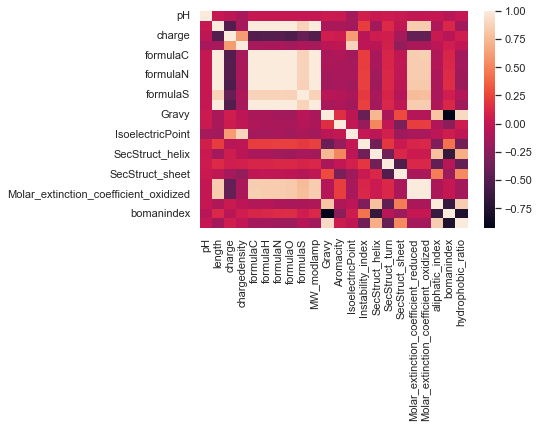

In [20]:
sn.heatmap(corr_matrix.iloc[1:23,1:23], annot=False)

Clustermap da correlação

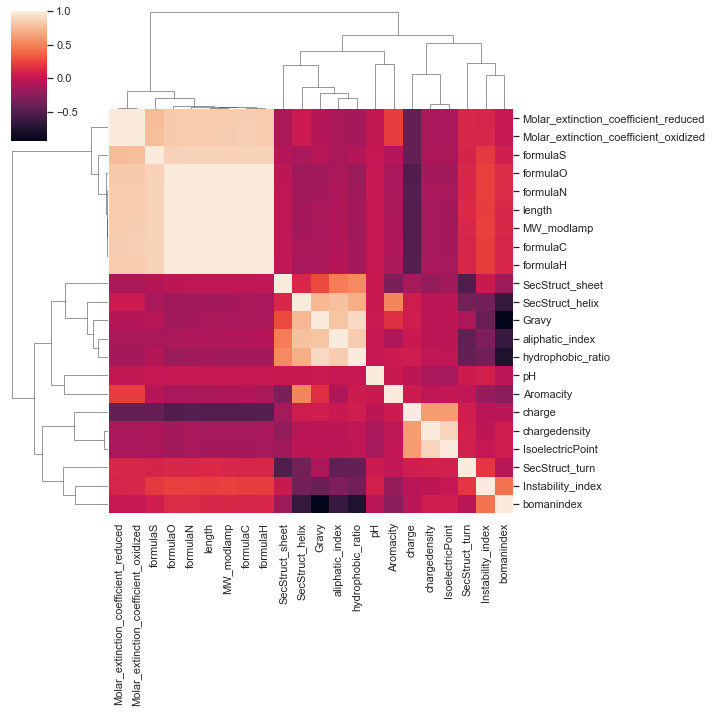

In [21]:
#clustermap / clustering hierárquico
sn.clustermap(corr_matrix.iloc[1:23,1:23])

In [22]:
#o Y tem sempre correlações inferiores a 0.25 com as outras variáveis

#idealmente deviamos eliminar as variáveis do X que estão muito correlacionadas entre si,
#porque não vão adicionar mais info à análise ----> justificar a sua correlação fazer sentido
#do ponto de vista biológico (por exemplo, as variáveis das fórmulas estão todas muito relacionadas entre si)

Seleção de features que têm uma correlação muito elevada, superior a 0.8

Resultado: {'bomanindex', 'formulaH', 'formulaO', 'hydrophobic_ratio', 'Molar_extinction_coefficient_reduced', 'formulaC', 'IsoelectricPoint', 'formulaN', 'formulaS', 'Molar_extinction_coefficient_oxidized', 'MW_modlamp'}


In [23]:
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

len(correlated_features)
print(correlated_features)

{'formulaS', 'bomanindex', 'formulaH', 'formulaO', 'formulaC', 'Molar_extinction_coefficient_reduced', 'IsoelectricPoint', 'formulaN', 'hydrophobic_ratio', 'Molar_extinction_coefficient_oxidized', 'MW_modlamp'}


Dada a elevada correlação entre as features anteriores, decidimos retira-las da análise seguinte de maneira a obter melhores resultados.

features retiradas: 


In [24]:
drop_features = {'Molar_extinction_coefficient_reduced', 'Molar_extinction_coefficient_oxidized', 'formulaC', 'hydrophobic_ratio', 'formulaO', 'IsoelectricPoint', 'formulaN', 'MW_modlamp', 'formulaH', 'formulaS', 'bomanindex'}
data_scale.drop(labels = drop_features, axis = 1, inplace = True)


Ficamos apenas com as seguintes colunas: 

In [25]:
data_scale.columns

Index(['Unnamed: 0', 'pH', 'length', 'charge', 'chargedensity', 'Gravy',
       'Aromacity', 'Instability_index', 'SecStruct_helix', 'SecStruct_turn',
       'SecStruct_sheet', 'aliphatic_index', 'tm'],
      dtype='object')

In [26]:
data_scale

,Unnamed: 0,pH,length,charge,chargedensity,Gravy,Aromacity,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,aliphatic_index,tm
0,-1.731991,0.050944,-0.278739,0.192039,0.041713,1.496181,-0.864209,-1.064756,0.459141,-0.341062,1.736920,1.233539,1.918961
1,-1.731870,0.050944,-0.406481,-0.387246,-0.957675,-2.382684,-1.523549,2.169647,-1.860071,-1.488109,2.051137,-0.915022,0.083704
2,-1.731749,0.050944,0.083584,0.902139,0.828932,-1.194683,-0.001893,-0.474614,-1.950464,0.946386,-1.123765,-2.152786,-0.644573
3,-1.731629,0.050944,-0.455255,-0.819847,-1.906825,-0.559893,-0.348875,0.883051,-0.634913,-0.250979,0.626853,-0.447528,-0.156628
4,-1.731508,0.050944,2.299329,-0.889222,-0.228271,-0.224447,-0.594790,0.457290,-0.553913,1.523183,-1.272651,-0.520198,0.010876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,1.731508,0.050944,0.204358,0.590971,0.459809,-0.655514,0.344517,0.715842,-0.189330,0.368423,-0.901639,-0.655943,0.178380
28735,1.731629,0.050944,0.018552,0.116981,0.006371,0.721954,0.272111,-0.457370,0.624586,-0.196490,0.062991,0.535459,-0.884904
28736,1.731749,0.050944,-0.773449,0.131242,-0.419214,-0.011062,1.447867,0.327771,-0.686476,0.544941,-0.204789,-1.573924,1.110574
28737,1.731870,0.050944,0.306552,-0.208823,-0.243604,0.599165,-0.250095,-0.339925,-0.176588,0.958301,-0.165912,-0.130515,0.098269


Correlação das features finais

In [27]:
corr = data_scale.corr()
#corr_matrix

#transformar em pandas dataframe (mais facil visualizaçao)
corr_data = pd.DataFrame(corr)
corr_data

,Unnamed: 0,pH,length,charge,chargedensity,Gravy,Aromacity,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,aliphatic_index,tm
Unnamed: 0,1.000000,-0.019184,-0.016976,0.022823,0.018067,0.001736,-0.014452,-0.039385,0.024489,-0.021122,-0.017594,0.028664,0.003711
pH,-0.019184,1.000000,0.012413,-0.026170,-0.127817,0.029795,0.025947,0.067457,0.024607,0.040893,0.025240,0.008056,0.004650
length,-0.016976,0.012413,1.000000,-0.509214,-0.133545,-0.119991,-0.115971,0.221563,-0.145833,0.130881,-0.020341,-0.095124,-0.076283
charge,0.022823,-0.026170,-0.509214,1.000000,0.611052,0.060419,0.043203,-0.050752,0.047601,0.057354,-0.130251,0.026766,0.049609
chargedensity,0.018067,-0.127817,-0.133545,0.611052,1.000000,-0.031761,-0.019413,-0.030650,-0.040692,0.076594,-0.213483,-0.036021,-0.011778
Gravy,0.001736,0.029795,-0.119991,0.060419,-0.031761,1.000000,0.150013,-0.407381,0.743926,-0.119299,0.273797,0.798714,0.163453
Aromacity,-0.014452,0.025947,-0.115971,0.043203,-0.019413,0.150013,1.000000,-0.197505,0.516164,-0.009741,-0.320153,-0.098000,-0.016665
Instability_index,-0.039385,0.067457,0.221563,-0.050752,-0.030650,-0.407381,-0.197505,1.000000,-0.375841,0.193396,0.028687,-0.309050,-0.037649
SecStruct_helix,0.024489,0.024607,-0.145833,0.047601,-0.040692,0.743926,0.516164,-0.375841,1.000000,-0.360122,0.116827,0.782265,0.168602
SecStruct_turn,-0.021122,0.040893,0.130881,0.057354,0.076594,-0.119299,-0.009741,0.193396,-0.360122,1.000000,-0.521899,-0.439999,-0.053079


<AxesSubplot: >

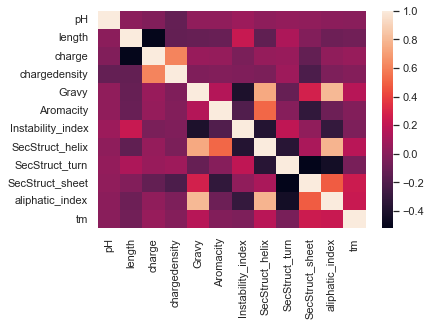

In [28]:
sn.heatmap(corr.iloc[1:23,1:23], annot=False)

Boxplots para cada variável continua

O objetivo é perceber se os valores são parecidos, se há outliers

<AxesSubplot: >

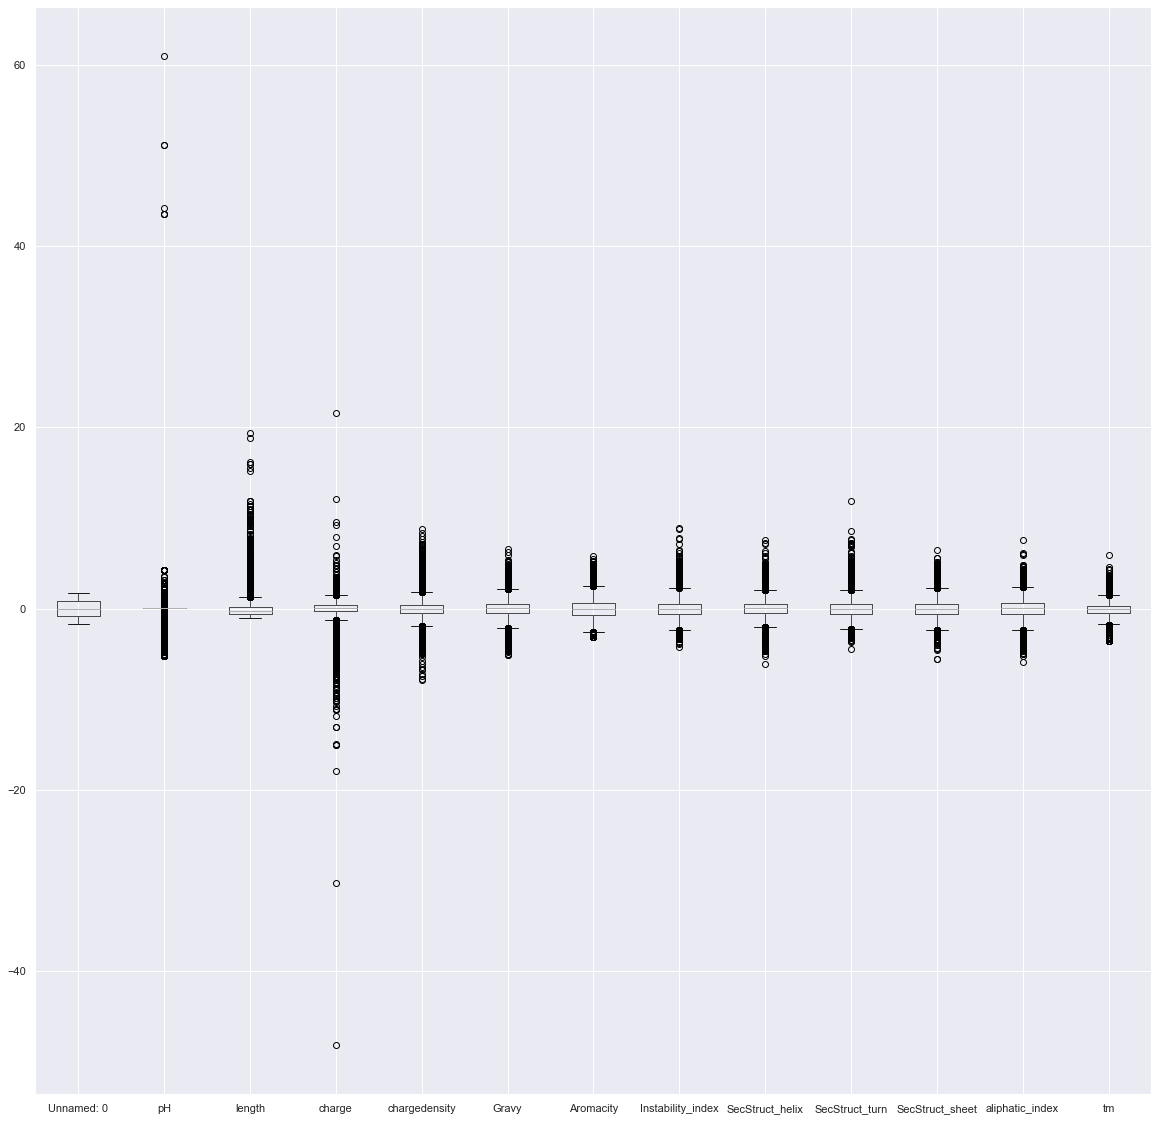

In [29]:
data_scale.boxplot(figsize=(20, 20))

### Análise não supervisionada

In [30]:
data_scale

,Unnamed: 0,pH,length,charge,chargedensity,Gravy,Aromacity,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,aliphatic_index,tm
0,-1.731991,0.050944,-0.278739,0.192039,0.041713,1.496181,-0.864209,-1.064756,0.459141,-0.341062,1.736920,1.233539,1.918961
1,-1.731870,0.050944,-0.406481,-0.387246,-0.957675,-2.382684,-1.523549,2.169647,-1.860071,-1.488109,2.051137,-0.915022,0.083704
2,-1.731749,0.050944,0.083584,0.902139,0.828932,-1.194683,-0.001893,-0.474614,-1.950464,0.946386,-1.123765,-2.152786,-0.644573
3,-1.731629,0.050944,-0.455255,-0.819847,-1.906825,-0.559893,-0.348875,0.883051,-0.634913,-0.250979,0.626853,-0.447528,-0.156628
4,-1.731508,0.050944,2.299329,-0.889222,-0.228271,-0.224447,-0.594790,0.457290,-0.553913,1.523183,-1.272651,-0.520198,0.010876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28734,1.731508,0.050944,0.204358,0.590971,0.459809,-0.655514,0.344517,0.715842,-0.189330,0.368423,-0.901639,-0.655943,0.178380
28735,1.731629,0.050944,0.018552,0.116981,0.006371,0.721954,0.272111,-0.457370,0.624586,-0.196490,0.062991,0.535459,-0.884904
28736,1.731749,0.050944,-0.773449,0.131242,-0.419214,-0.011062,1.447867,0.327771,-0.686476,0.544941,-0.204789,-1.573924,1.110574
28737,1.731870,0.050944,0.306552,-0.208823,-0.243604,0.599165,-0.250095,-0.339925,-0.176588,0.958301,-0.165912,-0.130515,0.098269


In [31]:
#separar X e Y 
X = data_scale.iloc[:, 1:-1]
Y = data_scale.iloc[:, -1]

In [32]:
#visualizar X
X

,pH,length,charge,chargedensity,Gravy,Aromacity,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,aliphatic_index
0,0.050944,-0.278739,0.192039,0.041713,1.496181,-0.864209,-1.064756,0.459141,-0.341062,1.736920,1.233539
1,0.050944,-0.406481,-0.387246,-0.957675,-2.382684,-1.523549,2.169647,-1.860071,-1.488109,2.051137,-0.915022
2,0.050944,0.083584,0.902139,0.828932,-1.194683,-0.001893,-0.474614,-1.950464,0.946386,-1.123765,-2.152786
3,0.050944,-0.455255,-0.819847,-1.906825,-0.559893,-0.348875,0.883051,-0.634913,-0.250979,0.626853,-0.447528
4,0.050944,2.299329,-0.889222,-0.228271,-0.224447,-0.594790,0.457290,-0.553913,1.523183,-1.272651,-0.520198
...,...,...,...,...,...,...,...,...,...,...,...
28734,0.050944,0.204358,0.590971,0.459809,-0.655514,0.344517,0.715842,-0.189330,0.368423,-0.901639,-0.655943
28735,0.050944,0.018552,0.116981,0.006371,0.721954,0.272111,-0.457370,0.624586,-0.196490,0.062991,0.535459
28736,0.050944,-0.773449,0.131242,-0.419214,-0.011062,1.447867,0.327771,-0.686476,0.544941,-0.204789,-1.573924
28737,0.050944,0.306552,-0.208823,-0.243604,0.599165,-0.250095,-0.339925,-0.176588,0.958301,-0.165912,-0.130515


In [33]:
#visualizar Y (neste momento é um panda series / array)
print(Y)

#converter Y para pandas dataframe, pois por vezes é mais fácil utilizar este formato
data_Y = Y.to_frame(name = "Y")
data_Y

0        1.918961
1        0.083704
2       -0.644573
3       -0.156628
4        0.010876
           ...   
28734    0.178380
28735   -0.884904
28736    1.110574
28737    0.098269
28738   -0.855773
Name: tm, Length: 28739, dtype: float64


,Y
0,1.918961
1,0.083704
2,-0.644573
3,-0.156628
4,0.010876
...,...
28734,0.178380
28735,-0.884904
28736,1.110574
28737,0.098269


Analisar os valores de tm, de forma a criar, a partir dessa, uma outra variável, mas desta vez categórica / qualitativa classificando em "tm baixo" ou "tm alto" consoante os valores de tm

                  Y
count  2.873900e+04
mean  -6.335638e-16
std    1.000017e+00
min   -3.594094e+00
25%   -5.134831e-01
50%   -9.836538e-02
75%    3.021868e-01
max    5.873504e+00


<AxesSubplot: >

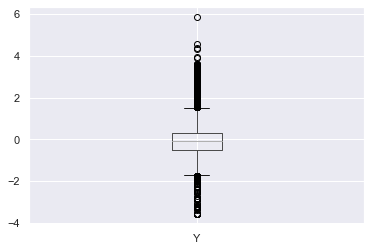

In [34]:
summary = data_Y.describe() #data_Y é pandas dataframe
print(summary)
data_Y.boxplot()

Y categorico

In [35]:
Y_categorical = Y.copy() #copia para não alterar Y (nota Y é array)
mean = Y_categorical.mean()
median = Y_categorical.median()

#criar variavel categorica dividindo os valores de tm de acordo com média

Y_categorical[Y_categorical > mean] = "elevado"
Y_categorical[Y_categorical != "elevado"] = "baixo"

Y_categorical #Y_categorical é array / panda series

0        elevado
1        elevado
2          baixo
3          baixo
4        elevado
          ...   
28734    elevado
28735      baixo
28736    elevado
28737    elevado
28738      baixo
Name: tm, Length: 28739, dtype: object

In [36]:
#converter o array / panda series em pandas dataframe 

data_Y_categorical = Y_categorical.to_frame(name = "Y_categorical")
data_Y_categorical

#frequencia de cada categoria
print('Frequência de cada categoria:\n')
data_Y_categorical.groupby("Y_categorical").size()

Frequência de cada categoria:



Y_categorical
baixo      16341
elevado    12398
dtype: int64

# Sónia vê isto por favor, não percebi

In [ ]:
#Com essas categorias, tentar encontrar correlações da tm (baixo/alto) com as outras variáveis continuas do X

#Penso que talvez possa ser um "t test" independente às médias dos dois grupos (tm baixo / alto) ou equivalente

#A pergunta é: quais as variáveis que têm valores significativamente diferentes entre os dois grupos: tm alto e tm baixo


Clustering hierárquico

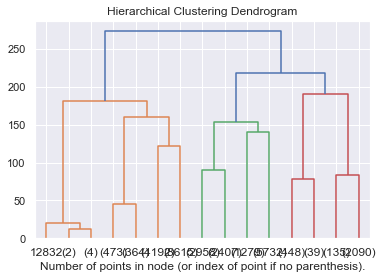

In [107]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()



# Nota importante 

ALTERAR FORMATAÇÃO (ver aqui: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html )

COMO INTERPRETAR? Era giro tentar se perceber se os dois grandes clusters correspondem a tm alto / baixo

In [108]:
hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hclust.fit(X)
res_hc = hclust.labels_
pd.crosstab(data_Y_categorical["Y_categorical"], res_hc)

col_0,0,1
Y_categorical,,
baixo,9250,7091
elevado,5838,6560


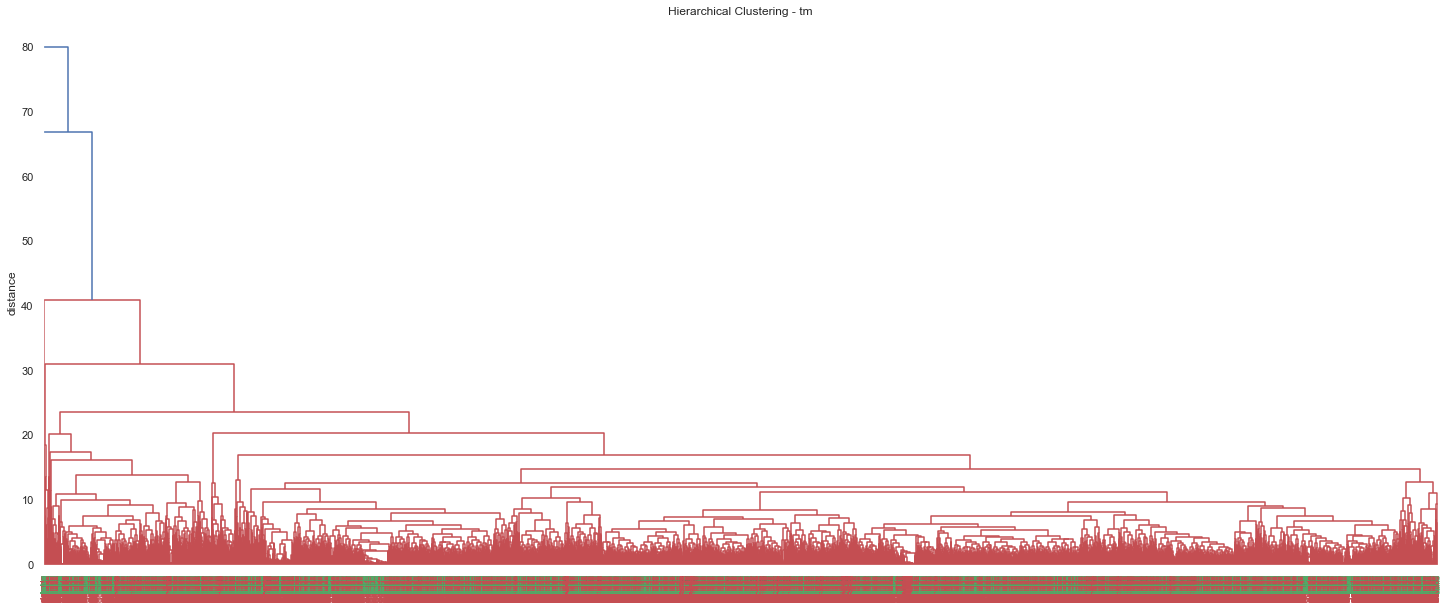

In [109]:
Z = linkage(X, method='complete', metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(data_Y_categorical["Y_categorical"]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering - tm')
plt.ylabel('distance')


# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'elevado': 'r', 'baixo': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()


Clustering kmeans

# Dá me erro 

In [117]:
k=2 #valor inicial arbitrário, depois experimentar mesmo codigo com k=3 e k=10

kmeans_dataset = KMeans(n_clusters=k, max_iter=1000)
kmeans_dataset.fit(X)
kmeans_dataset.predict(X)

labels = kmeans_dataset.labels_
print(labels)

centroids = kmeans_dataset.cluster_centers_
print(centroids)

pd.crosstab(labels,data_Y_categorical["Y_categorical"], rownames=['clusters'] )


AttributeError: 'NoneType' object has no attribute 'split'

# nota importante

gráficos dão sempre erro, mas poderia ser importante aqui como estratégia para VISUALIZAR DADOS
e não conseguirmos gráficos, pelo menos tentar INTERPRETAR TABELA

PCA

In [118]:
pca_cach = PCA(n_components=3) 
pca_cach.fit(X)

X_r = pca_cach.transform(X) # transformacao dos dados no novo espaço utilizando apenas 5 CP

print('Var. explicada: %s'% str(pca_cach.explained_variance_ratio_))
print('Soma:', sum(pca_cach.explained_variance_ratio_) * 100, "%")

Var. explicada: [0.29  0.184 0.139]
Soma: 61.325497622527045 %


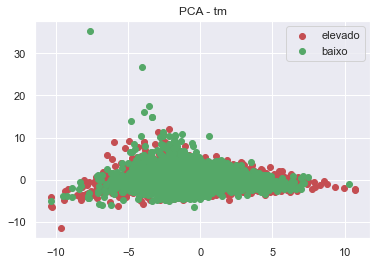

In [119]:
meta_values = data_Y_categorical["Y_categorical"]
plt.figure()
for c, name in zip("rgb", ["elevado", "baixo"]):
    plt.scatter(X_r[meta_values == name, 0], X_r[meta_values == name, 1], c=c, label=name)
plt.legend()
plt.title('PCA - tm')
plt.show()


# nota importante 

#INTERPRETAR PCA, experimentar diferentes n

TSNE

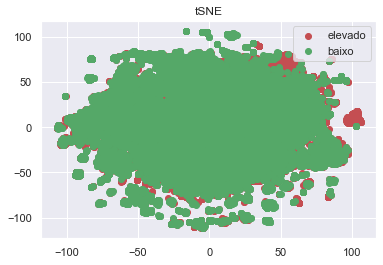

In [120]:

tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(X)
meta_values = data_Y_categorical["Y_categorical"]

plt.figure()
for c, name in zip("rgb", ["elevado", "baixo"]):
    plt.scatter(points[meta_values == name, 0], points[meta_values == name, 1], c=c, label=name)
plt.title("tSNE")
plt.legend(loc='best', shadow=False)
plt.show()


# nota importante 

INTERPRETAR TSNE, alterar n_components

# Machine Learning

In [37]:
data_Y_categorical

,Y_categorical
0,elevado
1,elevado
2,baixo
3,baixo
4,elevado
...,...
28734,elevado
28735,baixo
28736,elevado
28737,elevado


A partir deste momento, o nosso y é uma variavel binaria em que 0 representa um tm baixo em relação à média e 1 reprensenta um tm elevado em relação à média.

In [38]:
data_y = data_Y_categorical.replace(['baixo', 'elevado'], [0, 1])
data_y

,Y_categorical
0,1
1,1
2,0
3,0
4,1
...,...
28734,1
28735,0
28736,1
28737,1


Existem 16 341 valores de tm inferiores à média e 12 398 valores de tm superiores à média

In [39]:
data_y.groupby("Y_categorical").size()

Y_categorical
0    16341
1    12398
dtype: int64

Dividir os dados em treino e em teste

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, data_y, test_size = 0.25, random_state = 500)


print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (21554, 11) (21554, 1)
Test:  (7185, 11) (7185, 1)


Regressão e curva roc

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
def score_test_set(model, X_test, y_test):
    # score test set
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)
    except:
        y_prob = None
    print('accuracy', accuracy_score(y_test, y_pred))
    print('MCC', matthews_corrcoef(y_test, y_pred))
    print('f1 score', f1_score(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('fdr', float(fp) / (tp + fp))
    print('sn', float(tp) / (tp + fn))
    print('sp', float(tn) / (tn + fp))

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

accuracy 0.6140570633263744
MCC 0.1737756257984703
f1 score 0.3959921585711174
fdr 0.4124111182934712
sn 0.29862023653088043
sp 0.8459309345568703
[[3503  638]
 [2135  909]]
              precision    recall  f1-score   support

           0       0.62      0.85      0.72      4141
           1       0.59      0.30      0.40      3044

    accuracy                           0.61      7185
   macro avg       0.60      0.57      0.56      7185
weighted avg       0.61      0.61      0.58      7185



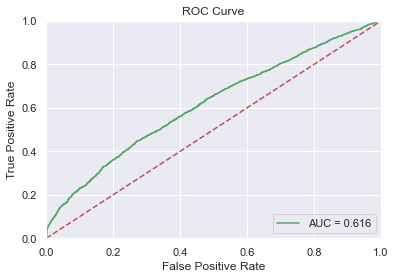

ROC AUC score: 0.6163


In [43]:
score_test_set(model, X_test, y_test)
# ROC_AUC
# prediction = model.predict_proba(X_test)

preds = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'g', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('ROC AUC score:', round(roc_auc, 4))

Comparar os modelos com e sem pesos

Como as proporções entre as 2 categorias de y são diferentes, os pesos vão ser diferentes também.
Assim, para a categoria '0' que tem 16 341, a proporção vai ser de 0.75, enquanto que para a categoria '1' que tem 12 398, a porpoção vai ser 1.

In [44]:
#Test and compare multiple models

models = [('LR', LogisticRegression()),
          ('LR-W', LogisticRegression(class_weight={0: 0.75, 1: 1})),
          ('RF', RandomForestClassifier()),
          ('RF-W', RandomForestClassifier(class_weight={0: 0.75, 1: 1})),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('SVM-W', SVC(class_weight={0: 0.75, 1: 1})),
          ('DT', DecisionTreeClassifier()),
          ('DT-W', DecisionTreeClassifier(class_weight={0: 0.75, 1: 1}))]


names = []
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cross_val = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cross_val)
    names.append(name)
    msg = "%s: %f SD:%f" % (name, cross_val.mean(), cross_val.std())
    print(msg)


LR: 0.390466 SD:0.016361
LR-W: 0.541260 SD:0.013104
RF: 0.563862 SD:0.012359
RF-W: 0.557785 SD:0.014105
KNN: 0.544227 SD:0.009499
SVM: 0.464371 SD:0.015898
SVM-W: 0.583791 SD:0.008377
DT: 0.542716 SD:0.011612
DT-W: 0.540673 SD:0.015805


plot dos resultados -- all models

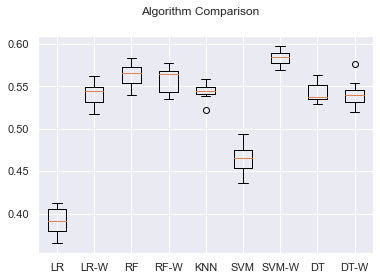

In [45]:
# Plot the results
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [54]:
columns = X.columns
columns

Index(['pH', 'length', 'charge', 'chargedensity', 'Gravy', 'Aromacity',
       'Instability_index', 'SecStruct_helix', 'SecStruct_turn',
       'SecStruct_sheet', 'aliphatic_index'],
      dtype='object')

SVM

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.598 total time=   6.7s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.600 total time=   6.5s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.602 total time=   6.4s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.598 total time=   6.6s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.597 total time=   6.3s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.597 total time=   7.5s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.602 total time=   7.6s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.604 total time=   7.2s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.600 total time=   7.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.596 total time=   7.3s
[CV 1/5] END ................C=1, kernel=linear;, score=0.597 total time=  12.1s
[CV 2/5] END ................C=1, kernel=linear;,

<AxesSubplot: >

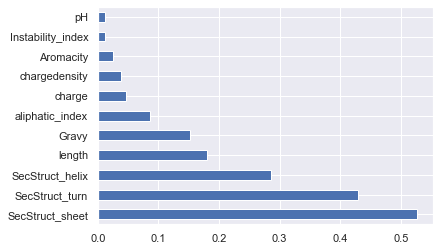

In [55]:
param_grid = {'C': [0.01,0.1,1],
#               'C': [0.1, 1, 10]
              'kernel': ['linear']}

#hyperparameter optimization algorithm
grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)


#SCORE THE TEST SET
score_test_set(grid, X_test, y_test)


#feature importance
pd.Series(abs(grid.best_estimator_.coef_[0]), index=columns).nlargest(20).plot(kind='barh')


Regressão logistica sem peso com RandomizedSearchCV

accuracy 0.6129436325678497
MCC 0.1709378073459978
f1 score 0.3931922321623391
fdr 0.41455490578297594
sn 0.2959921156373193
sp 0.8459309345568703
[[3503  638]
 [2143  901]]
              precision    recall  f1-score   support

           0       0.62      0.85      0.72      4141
           1       0.59      0.30      0.39      3044

    accuracy                           0.61      7185
   macro avg       0.60      0.57      0.55      7185
weighted avg       0.61      0.61      0.58      7185



<AxesSubplot: >

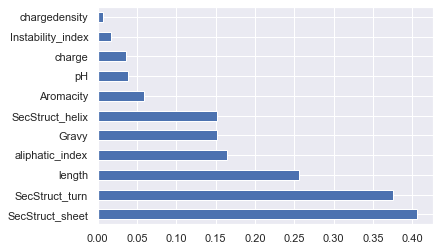

In [56]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)
clf
search = clf.fit(X_train, y_train)
search.best_params_

score_test_set(search, X_test, y_test)

pd.Series(abs(search.best_estimator_.coef_[0]), index=columns).nlargest(20).plot(kind='barh')

RandomForest sem pesos com RandomizedSearchCV¶

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................n_estimators=10;, score=0.642 total time=   0.5s
[CV 2/5] END ...................n_estimators=10;, score=0.653 total time=   0.5s
[CV 3/5] END ...................n_estimators=10;, score=0.651 total time=   0.5s
[CV 4/5] END ...................n_estimators=10;, score=0.648 total time=   0.5s
[CV 5/5] END ...................n_estimators=10;, score=0.644 total time=   0.5s
[CV 1/5] END ..................n_estimators=100;, score=0.669 total time=   6.0s
[CV 2/5] END ..................n_estimators=100;, score=0.665 total time=   5.8s
[CV 3/5] END ..................n_estimators=100;, score=0.676 total time=   5.8s
[CV 4/5] END ..................n_estimators=100;, score=0.672 total time=   5.7s
[CV 5/5] END ..................n_estimators=100;, score=0.654 total time=   6.1s
[CV 1/5] END ..................n_estimators=200;, score=0.672 total time=  11.7s
[CV 2/5] END ..................n_estimators=200;,

<AxesSubplot: >

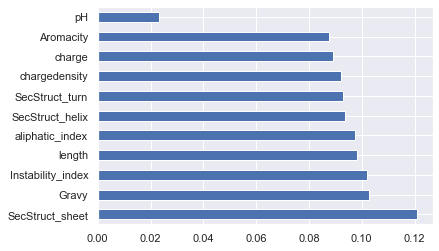

In [57]:
param_grid = {'n_estimators': [10, 100, 200]}

#hyperparameter optimization algorithm
grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
#SCORE THE TEST SET
score_test_set(grid, X_test, y_test)

# feature importance for RF
pd.Series(abs(grid.best_estimator_.feature_importances_), index= columns).nlargest(20).plot(kind='barh')

Feature selection

Select Percentile

In [68]:
select = SelectPercentile(score_func = f_classif, percentile = 25)
select.fit(X_train, y_train)

train_x = select.transform(X_train)
test_x = select.transform(X_test)

model = LogisticRegression()

#cross validation
scores = cross_val_score(clf, train_x, y_train, cv=5)
print('Scores: ', scores)

# treino
clf.fit(train_x, y_train)

# prever
y_pred = clf.predict(test_x)

# calcular a accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy - Select Percentile: ', acc)

Scores:  [0.619 0.627 0.612 0.614 0.623]
Accuracy - Select Percentile:  0.6171189979123173


Variance Threshold

In [70]:
select = VarianceThreshold(threshold=0.5)
select.fit(X_train)

train_x = select.transform(X_train)
test_x = select.transform(X_test)

model = LogisticRegression()

#cross validation
scores = cross_val_score(clf, train_x, y_train, cv=5)
print('Scores: ', scores)

# treino
clf.fit(train_x, y_train)

# prever
y_pred = clf.predict(test_x)

# calcular a accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy - Variance Threshold: ', acc)

Scores:  [0.658 0.669 0.664 0.659 0.656]
Accuracy - Variance Threshold:  0.6698677800974252


In [71]:
# selctKBest não dá porque não aceita valores negativos

# Perguntas

ver histograma ???

apagar as notas que fazem menção que nao sabemos coisas, tem de estar tudo direitinho para a apresentação

quando separamos o x e o y, o x nao tem a seq pq nao dá para fazeres analise ML com numeros e letras e a seq nao te vai dar informação nenhuma

pq é que nao da valores nos teste de shapiro??

ver notas depois da correlaçao

Sonia: ve o que disseste depois do y categorico, eu assinalei lá no notebook mas nao percebi o que querias!!!!

graficos -- ver pq deu me mal o do clustering com kmeans


fazer???

- feature selection???

- Ensemble
- Bagging Classifier
- Random Forest
- Voting Classifier - simple voting
- Voting Classifier - with weights